<a href="https://colab.research.google.com/github/d4rkl0rd3r3b05/AI_ML/blob/main/Pytorch_Practice_Non_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import for non-linear classification


In [ ]:
import torch
from torch import nn
from torch import optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.datasets import make_circles

## Writing Device Agonistic Code

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Get Sample Data for the problem

In [ ]:
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.03, random_state=42)
X, y = torch.tensor(X, dtype=torch.float32).to(device), torch.tensor(y, dtype=torch.float32).to(device)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

X_train.shape, y_train.shape

(torch.Size([600, 2]), torch.Size([600]))

## Plot Sample Data

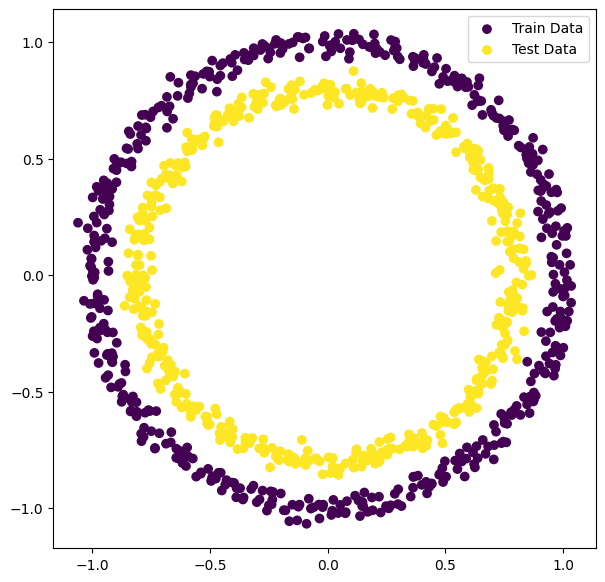

In [ ]:
plt.figure(figsize=(7, 7))

#train data
plt.scatter(X_train[:,0], X_train[:,1], label="Train Data", c=y_train, cmap='viridis')

#test data
plt.scatter(X_test[:,0], X_test[:,1], label="Test Data", c=y_test, cmap='viridis')

plt.legend()

plt.show()

## Create a classification model

In [ ]:
class NonLinearClassifier(nn.Module):
  def __init__(self, input_features, output_features, hidden_nodes=8) -> None:
    super().__init__()

    self.layer = nn.Sequential(nn.Linear(in_features=input_features, out_features=hidden_nodes),
                               nn.ReLU(),
                               nn.Linear(in_features=hidden_nodes, out_features=hidden_nodes),
                               nn.ReLU(),
                               nn.Linear(in_features=hidden_nodes, out_features=output_features))

  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.layer(x)

## Do a sample run with model

In [ ]:
classifier = NonLinearClassifier(2, 1)

classifier.eval()
with torch.inference_mode():
  y_pred = classifier(X_train[1])

## Downloading Classifier plot

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

## Classification Prediction Model Plotting

In [ ]:
def plot_classification_regions(X, y):
  plt.figure(figsize=(7, 7))

  #train data
  plot_decision_boundary(classifier, X, y)

  plt.legend()

  plt.show()

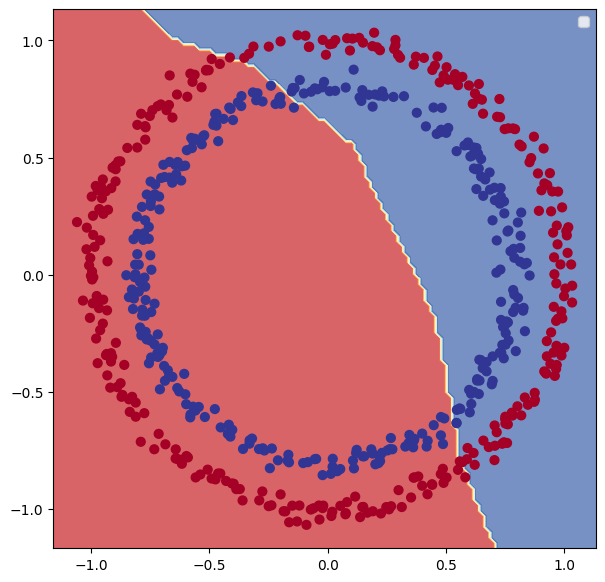

In [ ]:
plot_classification_regions(X_train, y_train)

# Defining loss and optimizer

In [ ]:
criterion = nn.BCEWithLogitsLoss()

optimizer = optim.Adam(params=classifier.parameters(), lr= 0.01)

# Calculate accuracy (a classification metric)
def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

## Pytorch Classification workflow

In [ ]:
epoch = 100

for index in range(epoch):
  classifier.train()

  # Making prediction
  y_train_pred_logits = classifier(X_train).squeeze()
  y_train_pred = torch.round(torch.sigmoid(y_train_pred_logits))


  # Calculate loss
  train_loss = criterion(y_train_pred_logits, y_train)
  train_accuracy = accuracy(y_train, y_train_pred)


  optimizer.zero_grad()

  train_loss.backward()

  optimizer.step()

  # evaluation
  classifier.eval()
  with torch.inference_mode():
    y_test_pred_logits = classifier(X_test).squeeze()
    y_test_pred = torch.round(torch.sigmoid(y_test_pred_logits))

    test_loss = criterion(y_test_pred_logits, y_test)
    test_accuracy = accuracy(y_test, y_test_pred)

  if index % 10 == 0:
    print(f"Epoch: {index} Train loss: {train_loss} Train Accuracy: {train_accuracy} Test loss: {test_loss} Test Accuracy: {test_accuracy}")

Epoch: 0 Train loss: 0.6958144903182983 Train Accuracy: 47.66666666666667 Test loss: 0.6952410936355591 Test Accuracy: 47.25
Epoch: 10 Train loss: 0.6895596385002136 Train Accuracy: 51.83333333333333 Test loss: 0.6919037103652954 Test Accuracy: 50.74999999999999
Epoch: 20 Train loss: 0.6844363808631897 Train Accuracy: 53.0 Test loss: 0.6901441812515259 Test Accuracy: 51.0
Epoch: 30 Train loss: 0.6748797297477722 Train Accuracy: 60.333333333333336 Test loss: 0.683159351348877 Test Accuracy: 61.75000000000001
Epoch: 40 Train loss: 0.6562108993530273 Train Accuracy: 64.16666666666667 Test loss: 0.6671701073646545 Test Accuracy: 56.75
Epoch: 50 Train loss: 0.6199554800987244 Train Accuracy: 67.33333333333333 Test loss: 0.6369545459747314 Test Accuracy: 59.75
Epoch: 60 Train loss: 0.5514423251152039 Train Accuracy: 86.0 Test loss: 0.5714779496192932 Test Accuracy: 79.5
Epoch: 70 Train loss: 0.4622640907764435 Train Accuracy: 93.0 Test loss: 0.49469512701034546 Test Accuracy: 86.5
Epoch: 80 

## plot classification model

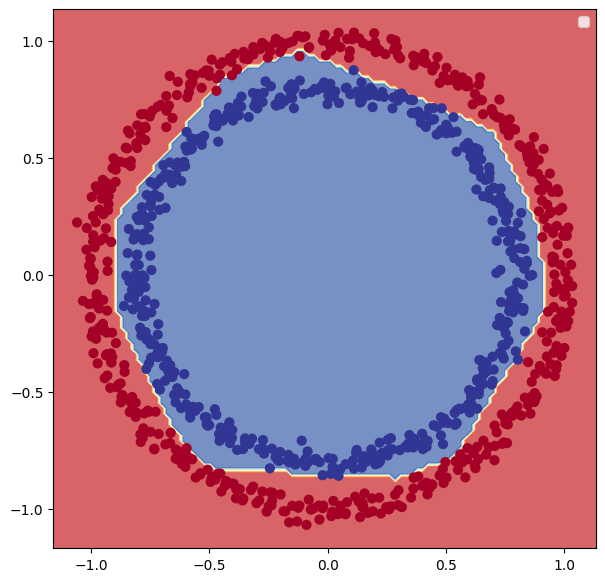

In [ ]:
plot_classification_regions(X=X, y=y)

## Saving Model

In [ ]:
from pathlib import Path


MODEL_FOLDER_PATH = Path('models')
MODEL_FOLDER_PATH.mkdir(parents=True, exist_ok=True)

MODEL_FILE_PATH = Path("Practice_Model_Non_Linear_Binary_Classification.pth")
MODEL_SAVE_PATH = MODEL_FOLDER_PATH / MODEL_FILE_PATH


torch.save(classifier.state_dict(), f = MODEL_SAVE_PATH)